# 机器学习实验四：贝叶斯分类估计评估模型
- **姓名：刘伟**
- **学号：2013029**
- **专业：物联网工程**

## 基本要求：
- 采用分层采样的方式将数据集划分为训练集和测试集
- 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率

### 加载数据

In [1]:
import math
import numpy as np  
import pandas as pd

f = open('D:\\NKU\\Semester_3\\机器学习\\wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
stds = [[],[],[]]                        #每一类的标准差
P = []
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
    
# 三类数据样本数目
test_len = [len(types[i]) for i in range(3)]   # 59  71  48
data_num = sum([len(types[i]) for i in range(3)])  # 178个样本


### 分层抽样

In [2]:
index = 0  
# 对每类数据进行分层抽样  7：3的分割比
for x_i in types:

    x_i = np.array(x_i)  #(59, 13) (71, 13) (48, 13)
    Len = x_i.shape[0]

    # 生成随机序列
    # print(x_i.shape)
    np.random.seed(7)
    row_indices = np.random.permutation(Len)
    # 接近于7：3 的分割线
    split_num = int(Len * 0.7)
    print("第",index+1,"类测试样本数量： ",Len - split_num)

    # 取训练数据
    x_i_train = x_i[row_indices[0:split_num],:]
    train_data[index] = x_i_train

    # 取测试数据
    x_i_test = x_i[row_indices[split_num:],:]
    test_data[index] = x_i_test

    # 索引
    index = index + 1
all_len = sum([len(train_data[i]) for i in range(3)])
print(all_len)
# 计算出每类数据占全部数据的比列概率 Pi
P = [len(train_data[i])/(data_num) for i in range(3)]
print(P)

第 1 类测试样本数量：  18
第 2 类测试样本数量：  22
第 3 类测试样本数量：  15
123
[0.2303370786516854, 0.2752808988764045, 0.1853932584269663]


### 朴素贝叶斯分类

In [3]:
# 利用朴素贝叶斯公式
# 计算数据在某一类别下的概率P
def Bayes(data, p, mean, std):
    result = p
    for i in range(len(data)):
        result *=  1 / (math.sqrt(2 * math.pi) * std[i]) * math.exp(-((data[i] - mean[i])**2) / (2 * (std[i]**2)))
    return result

In [4]:
# 调用朴素贝叶斯公式进行数据分类
def bayes_classificate():
    # 分别计算训练集上三个类的均值和标准差
    for index in range(3):
        means[index] = np.mean(train_data[index],axis=0)
        stds[index] = np.std(train_data[index],axis=0)
    wrong_num = 0  # 预测错误样本数
    pre_Y = []  # 预测结果
    test_Y = [] # 实际结果
    Pred_Max_Probability = []  # 对测试数据预测属于三类的概率
    for i in range(3):
        for t in test_data[i]:                  #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                # 由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                temp = Bayes(t,P[j],means[j],stds[j])
                # print(temp)
                my_type.append(temp)                        #这里将所有score保存
            # print(my_type)
            Pred_Max_Probability.append(my_type)
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            pre_Y.append(pre_type)
            test_Y.append(i)
            # pre_type = np.argmax(my_type)          #取分值最大的为预测类别
            if pre_type != i:                               #统计错误数
                wrong_num+=1
    return wrong_num, pre_Y, test_Y, Pred_Max_Probability

In [5]:
# 预测分类 返回结果
wrong_num, pre_Y, test_Y, Pred_Max_Probability = bayes_classificate()
print(wrong_num)    # 预测错误样本数
print(pre_Y)        # 预测结果
print(test_Y)       # 实际结果
# print(Pred_Max_Probability)

3
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## 中级要求
- 使用测试集评估模型，得到混淆矩阵，精度，召回率，F值

### 生成混淆矩阵
- 4*4 的整体预测矩阵

|      |   label1-预测数目值   |   label2-预测数目值   |   label3-预测数目值   |
| ---- | ---- | ---- | ---- |
|   label1-实际数目值   |      |      |      |
|   label2-实际数目值   |      |      |      |
|   label3-实际数目值   |      |      |      |

- 3*3 的俩俩混淆矩阵

|      |   labelx-预测数目值   |   labely-预测数目值   |
| ---- | ---- | ---- |
|   labelx-实际数目值   |      |      |
|   labely-实际数目值   |      |      |


In [6]:
def confuse_maxtria_4_4(predict, fact):   # 生成一个4*4的整体预测矩阵
    array = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for i in range(len(predict)):
        array[fact[i]][predict[i]] += 1
    return array

def confuse_maxtria_3_3(predict, fact):   # 生成一个3*3的混淆矩阵
    array = [[0, 0], [0, 0]]
    for i in range(len(predict)):
        array[fact[i]][predict[i]] += 1
    return array

def confuse_maxtria_3_3_3(predict, fact):   # 将数据进行拆分，生成三个3*3的混淆矩阵所需的数据集
    Len = len(fact)
    pred012 = [[],[],[]]
    fact012 = [[],[],[]]
    pred_01 = []
    fact_01 = []
    pred_02 = []
    fact_02 = []
    pred_12 = []
    fact_12 = []
    for i in range(Len):
        if predict[i] == fact[i]:
            pred012[predict[i]].append(predict[i])
            fact012[predict[i]].append(predict[i])
        elif predict[i] == 0:
            if fact[i] == 1:
                pred_01.append(predict[i])
                fact_01.append(fact[i])
            else:
                pred_02.append(predict[i])
                fact_02.append(fact[i])
        elif predict[i] == 1:
            if fact[i] == 0:
                pred_01.append(predict[i])
                fact_01.append(fact[i])
            else:
                pred_12.append(predict[i])
                fact_12.append(fact[i])
        elif predict[i] == 2:
            if fact[i] == 0:
                pred_02.append(predict[i])
                fact_02.append(fact[i])
            else:
                pred_12.append(predict[i])
                fact_12.append(fact[i])

    # 得到每俩类之间的一个混淆矩阵所需数据
    pred_01 = pred_01 + pred012[0] + pred012[1]
    fact_01 = fact_01 + fact012[0] + fact012[1]
    pred_02 = pred_02 + pred012[0] + pred012[2]
    fact_02 = fact_02 + fact012[0] + fact012[2]
    pred_12 = pred_12 + pred012[1] + pred012[2]
    fact_12 = fact_12 + fact012[1] + fact012[2]

    # 送入confuse_maxtria_3_3函数生成所需的混淆矩阵
    Array = []
    Array.append(confuse_maxtria_3_3(pred_01,fact_01))

    for i in range(len(pred_02)):
        pred_02[i] = 1 if pred_02[i] == 2 else 0
        fact_02[i] = 1 if fact_02[i] == 2 else 0
    Array.append(confuse_maxtria_3_3(pred_02,fact_02))

    for i in range(len(pred_12)):
        pred_12[i] -= 1
        fact_12[i] -= 1
    Array.append(confuse_maxtria_3_3(pred_12,fact_12))

    return Array
    
# 生成混淆矩阵
array_4_4 = confuse_maxtria_4_4(pre_Y, test_Y)
array_3_3 = confuse_maxtria_3_3_3(pre_Y, test_Y)
print("4*4整体预测矩阵是:")
print(array_4_4)
print("三个3*3的俩俩混淆矩阵")
print(array_3_3[0])
print(array_3_3[1])
print(array_3_3[2])

4*4整体预测矩阵是:
[[17, 1, 0], [1, 20, 1], [0, 0, 15]]
三个3*3的俩俩混淆矩阵
[[17, 1], [1, 20]]
[[17, 0], [0, 15]]
[[20, 1], [0, 15]]


### 输出精度、召回率、F值


In [7]:
# 对于预测label为 0 1 
print("对于预测label为 0 1 的精度：",int(array_3_3[0][0][0])/(int(array_3_3[0][0][0]+array_3_3[0][0][1])))
R = int(array_3_3[0][0][0])/(int(array_3_3[0][0][0]+array_3_3[0][1][0]))
print("对于预测label为 0 1 的召回率：",R)
P = int(array_3_3[0][0][0]+array_3_3[0][1][1])/(int(array_3_3[0][0][0]+array_3_3[0][0][1]+array_3_3[0][1][0]+array_3_3[0][1][1]))
print("对于预测label为 0 1 的准确率：",P)
print("对于预测label为 0 1 的F值:",(2*P*R)/(P+R))

# 对于预测label为 0 2 
print("对于预测label为 0 2 的精度：",int(array_3_3[1][0][0])/(int(array_3_3[1][0][0]+array_3_3[1][0][1])))
R = int(array_3_3[1][0][0])/(int(array_3_3[1][0][0]+array_3_3[1][1][0]))
print("对于预测label为 0 1 的召回率：",R)
P = int(array_3_3[1][0][0]+array_3_3[1][1][1])/(int(array_3_3[1][0][0]+array_3_3[1][0][1]+array_3_3[1][1][0]+array_3_3[1][1][1]))
print("对于预测label为 0 2 的准确率：",P)
print("对于预测label为 0 2 的F值:",(2*P*R)/(P+R))

# 对于预测label为 0 1 
print("对于预测label为 1 2 的精度：",int(array_3_3[2][0][0])/(int(array_3_3[2][0][0]+array_3_3[2][0][1])))
R = int(array_3_3[2][0][0])/(int(array_3_3[2][0][0]+array_3_3[2][1][0]))
print("对于预测label为 1 2 的召回率：",R)
P = int(array_3_3[2][0][0]+array_3_3[2][1][1])/(int(array_3_3[2][0][0]+array_3_3[2][0][1]+array_3_3[2][1][0]+array_3_3[2][1][1]))
print("对于预测label为 1 2 的准确率：",P)
print("对于预测label为 1 2 的F值:",(2*P*R)/(P+R))

对于预测label为 0 1 的精度： 0.9444444444444444
对于预测label为 0 1 的召回率： 0.9444444444444444
对于预测label为 0 1 的准确率： 0.9487179487179487
对于预测label为 0 1 的F值: 0.946576373212942
对于预测label为 0 2 的精度： 1.0
对于预测label为 0 1 的召回率： 1.0
对于预测label为 0 2 的准确率： 1.0
对于预测label为 0 2 的F值: 1.0
对于预测label为 1 2 的精度： 0.9523809523809523
对于预测label为 1 2 的召回率： 1.0
对于预测label为 1 2 的准确率： 0.9722222222222222
对于预测label为 1 2 的F值: 0.9859154929577464


## 高级要求
- 在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值
    1. 根据一系列样本被划分为正类的概率Score值，按照大小排序
    2. 从高到低，依次将“Score”值作为阈值threshold，当测试样本属于正样本的概率大于或等于这个threshold时，我们认为它为正样本，否则为负样本。
    3. 每次选取一个不同的threshold，得到一组FPR和TPR，以FPR值为横坐标和TPR值为纵坐标，即ROC曲线上的一点。
    4. 根据得到的每个坐标点 画图

In [8]:
# 计算画出ROC曲线所需的坐标点
def ROC(test_Y, Pred_Max_Probability,num):
    Score = []
    length = len(test_Y)
    Pred_Max_Probability = np.array(Pred_Max_Probability)

    FPR = [[],[],[]]  # 存有各个FPR的数据
    TPR = [[],[],[]]  # 存有各个TPR的数据

    for index in range(3):
        # 取出对应类别下预测的概率值
        Score = Pred_Max_Probability[:,index]
        # print(Score)
        # 进行排序  从高到低 选择Score即概率作为阈值进行判断
        sort_S = np.sort(Score)
        # print(sort_S)
        for i in range(length-1,-1,-1):
            threshold = sort_S[i]
            T = 0
            F = 0
            for i in range(length):
                # 当测试样本属于正样本的概率大于或等于这个threshold时
                # 认为它为正样本
                # 否则为负样本
                if(Score[i]>=threshold):
                    if(test_Y[i]==index):
                        T = T + 1
                    else:
                        F = F + 1
            # 利用得到正样本、负样本计算TPR、FPR的值，作为ROC曲线上的坐标点
            FPR[index].append(F/(np.sum(num)-num[index]))
            TPR[index].append(T/(num[index]))

    return TPR,FPR


In [9]:
num = []  # 统计测试数据中各类的数量
for i in range(3):
    num.append(len(test_data[i]))
# 生成ROC曲线所需的坐标点
TPR,FPR = ROC(test_Y,Pred_Max_Probability,num)
# 计算ROC曲线的面积AUC
AUC = []
for i in range(3):
    sum = 0
    for index in range(len(FPR[i])-1):
        sum += (FPR[i][index+1]-FPR[i][index])*(TPR[i][index])
    AUC.append(sum)

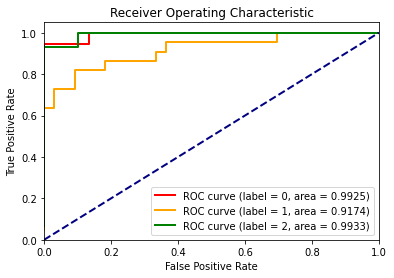

In [10]:
# 画图
import matplotlib.pyplot as plt
plt.figure()
lw = 2    # 对角线
plt.plot(FPR[0], TPR[0], color='red',
         lw=lw, label='ROC curve (label = %d, area = %0.4f)' % (0, AUC[0]))
plt.plot(FPR[1], TPR[1], color='orange',
         lw=lw, label='ROC curve (label = %d, area = %0.4f)' % (1, AUC[1]))
plt.plot(FPR[2], TPR[2], color='green',
         lw=lw, label='ROC curve (label = %d, area = %0.4f)' % (2, AUC[2]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()